In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
PA=np.array([ 6,4,3,2,1,1,1,1,1,0])
PB=np.array( [3,3,2,2,2,2,2,2,1,1])
PE=np.array( [1,1,1,1,1,1,1,1,1,1])

In [3]:
obs = np.array( [ 5,3,9,3,8,4,7]) -1  # observation indices

In [4]:
pA = PA / PA.sum()
pB = PB / PB.sum()
pE = PE / PE.sum()

pA, pB, pE

(array([0.3 , 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.  ]),
 array([0.15, 0.15, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.05, 0.05]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [5]:
log_AB = np.log(pA)/np.log(2) - np.log(pB)/np.log(2)
log_BE = np.log(pB)/np.log(2) - np.log(pE)/np.log(2)
print(log_BE)

[ 0.5849625  0.5849625  0.         0.         0.         0.
  0.         0.        -1.        -1.       ]


<ipython-input-5-9620a84cb650>:1: RuntimeWarning: divide by zero encountered in log
  log_AB = np.log(pA)/np.log(2) - np.log(pB)/np.log(2)


In [6]:
np.sum(log_AB[obs])

-1.8300749985576892

In [7]:
# So if this is the log-odds, the odds is:
np.power(2,-1.8300749985576892 )

0.2812499999999997

In [8]:
# Make sure this gives me the same number 
odds = (1.5* 1.5 * 1 * 1/2 * 1/2 * 1 * 1/2)
odds

0.28125

In [9]:
# so probability is 
pApost = odds / 1+odds 
pApost

0.5625

In [10]:
# So P(A, B, E) is 
(0.5625, 1-0.5625, 0 )  #(There was a 0 in the prior for E)

(0.5625, 0.4375, 0)

In [11]:
# In problem 4, we have seen a 10, so 
# postprobA = 0 

avg_BEgB = np.dot(log_BE, pB)
avg_BEgE = np.dot(log_BE, pE)
print(avg_BEgB ,avg_BEgE)
print((avg_BEgB +avg_BEgE )/ 2)

0.07548875021634678 -0.08300749985576887
-0.003759374819711045


In [12]:
threshold = np.log(99) / np.log(2) # How many bits in 99:1 ?
threshold

6.6293566200796095

In [13]:
# How many rolls (if B)
threshold  / 0.07548875021634678, -threshold/-0.08300749985576887 

(87.81913332887646, 79.86454996956375)

In [14]:
# So if B is true, it will take me an average of 
# 87.8 rolls; if E is true I will know it on average
# after 79.9 rolls


In [15]:
# The -infinity here is becuase the roll of 10 completely 
# rules out dice A.  P(10 | A ) is zero.

In [16]:
# 25% chance of dice B after the above set of 8 rolls


In [19]:
# halfhearted simulation
s = []
n=100
for h in range(1000):
    # Generate n random rolls from weighted pB distribution
    rolls = [np.where(np.random.multinomial(1,pB))[0][0] for i in range(n)]
    score = log_BE[rolls].sum() 
    s.append(score)
score

9.133837522355835

Text(0.5, 1.0, 'After 100 rolls..')

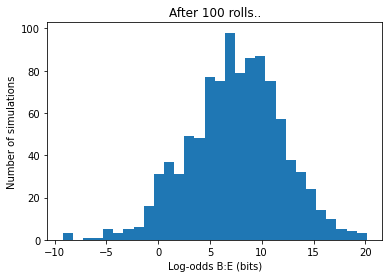

In [20]:
plt.hist(s, bins=30)
plt.xlabel("Log-odds B:E (bits)")
plt.ylabel("Number of simulations")
plt.title("After 100 rolls..")

In [ ]:
# What?  This has a mode around 8, after 100
# rolls, that's only .08 bits per roll... 

# Wait, that's the right answer.
# I am surprised that such a large fraciton 
# of the time the result will still be
# ambiguous after 100 rolls.

In [21]:
# halfhearted setup of simulation
s2 = []
n=1000
for h in range(1000):
    rolls = [np.where(np.random.multinomial(1,pB))[0][0] for i in range(n)]
    score = log_BE[rolls].sum() 
    s2.append(score)
score

100.94288773293337

Text(0.5, 1.0, 'After 1000 rolls, the CLT destroys everything')

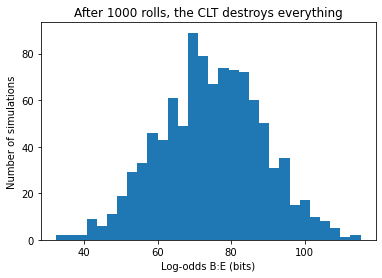

In [23]:
plt.hist(s2, bins=30)
plt.xlabel("Log-odds B:E (bits)")
plt.ylabel("Number of simulations")
plt.title("After 1000 rolls, the CLT destroys everything")